In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('BigMartTrain.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.shape

(8523, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

C:\Users\Mathematician\AppData\Local\Temp\ipykernel_16728\610123320.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Weight'],bins=100)


<Axes: xlabel='Item_Weight', ylabel='Density'>

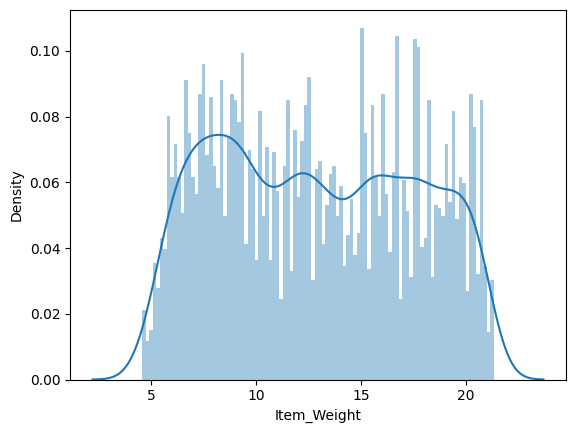

In [8]:
sns.distplot(df['Item_Weight'],bins=100)

In [9]:
df[df['Item_Weight']==np.NaN]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [10]:
df['Item_Weight'].fillna(0,inplace=True)

In [11]:
df[df['Item_Weight']==0].index

Int64Index([   7,   18,   21,   23,   29,   36,   38,   39,   49,   59,
            ...
            8458, 8463, 8469, 8472, 8480, 8485, 8487, 8488, 8490, 8504],
           dtype='int64', length=1463)

In [12]:
ind=df[df['Item_Weight']==0].index

In [13]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [14]:
for i in ind:
    it=df.iloc[i,0]
    df.iloc[i,1]=np.mean(df[df['Item_Identifier']==it]['Item_Weight'])

In [15]:
df[df['Item_Weight']==0].index

Int64Index([927, 1922, 4187, 5022], dtype='int64')

In [16]:
ind=df[df['Item_Weight']==0].index

In [17]:
df['Item_Weight'].replace(0,np.mean(df['Item_Weight']),inplace=True)

In [18]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [19]:
# df['Outlet_Size'] = df['Outlet_Size'].astype('category')
# sns.countplot(df['Outlet_Size'])

<Axes: xlabel='Outlet_Size', ylabel='count'>

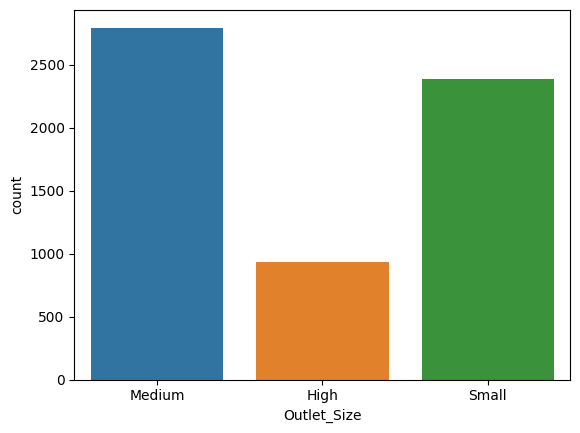

In [20]:
sns.countplot(x=df['Outlet_Size'])

In [21]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [22]:
df['Outlet_Size'].fillna('Missing',inplace=True)

<Axes: xlabel='Outlet_Size', ylabel='count'>

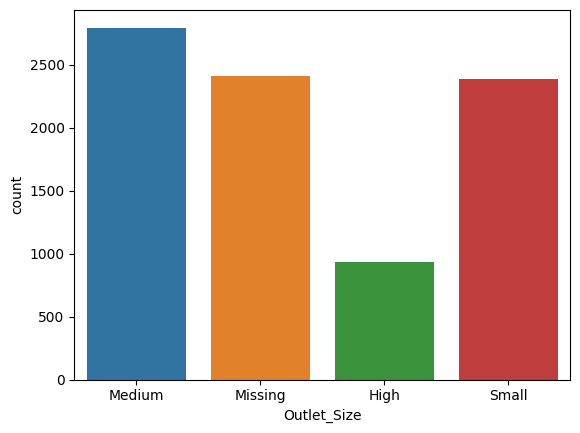

In [23]:
sns.countplot(x=df['Outlet_Size'])

In [24]:
df['Outlet_Size'].replace('Missing','Small',inplace=True)

In [25]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [26]:
df['Item_Identifier'].value_counts(normalize=True)*100

FDW13    0.117330
FDG33    0.117330
NCY18    0.105597
FDD38    0.105597
DRE49    0.105597
           ...   
FDY43    0.011733
FDQ60    0.011733
FDO33    0.011733
DRF48    0.011733
FDC23    0.011733
Name: Item_Identifier, Length: 1559, dtype: float64

In [27]:
df['Item_category']=df['Item_Identifier'].str[:2]

In [28]:
df['new_item']=df['Item_Identifier'].str[-2:].astype('int')

In [29]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [30]:
df['Item_Fat_Content'].replace(['Low Fat','Regular','LF','reg','low fat'],['Low Fat','Regular','Low Fat','Regular','Low Fat'],inplace=True)

In [31]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

C:\Users\Mathematician\AppData\Local\Temp\ipykernel_16728\3255610662.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Visibility'],bins=100)


<Axes: xlabel='Item_Visibility', ylabel='Density'>

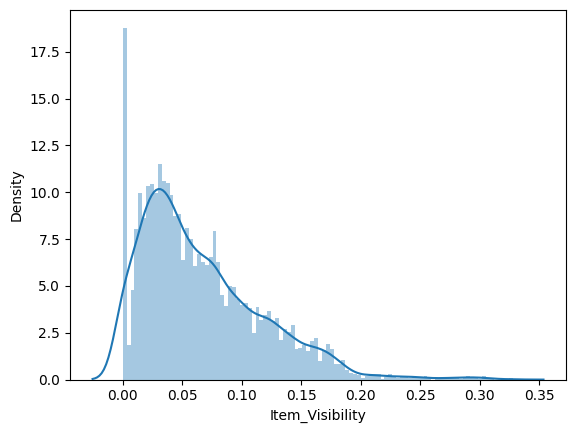

In [32]:
sns.distplot(df['Item_Visibility'],bins=100)

In [33]:
df[df['Item_Visibility']==0].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_category,new_item
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,7
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,19
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,FD,36
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266,FD,7
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064,FD,33


<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

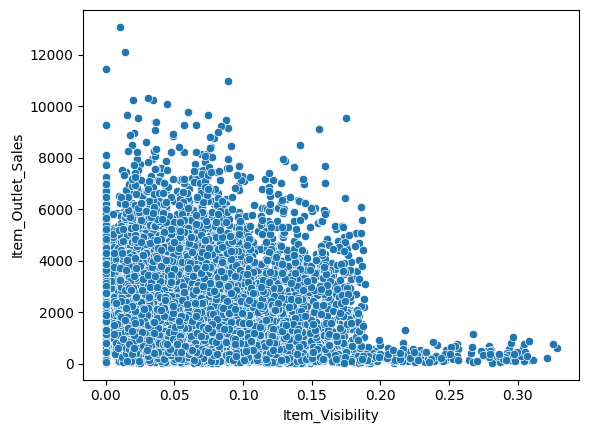

In [34]:
sns.scatterplot(x=df['Item_Visibility'],y=df['Item_Outlet_Sales'])

<Axes: xlabel='Item_Visibility', ylabel='Item_Weight'>

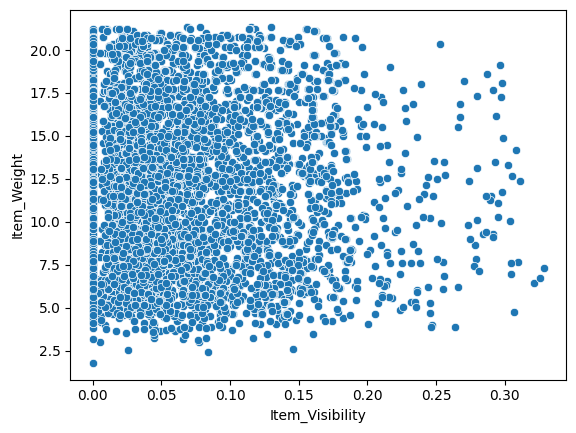

In [35]:
sns.scatterplot(x=df['Item_Visibility'],y=df['Item_Weight'])

In [36]:
ind=df[df['Item_Visibility']==0].index

In [37]:
for i in ind:
    it=df.iloc[i,1]
    df.iloc[i,3]=np.mean(df[df['Item_Weight']==it]['Item_Visibility'])

<Axes: xlabel='Item_Type', ylabel='count'>

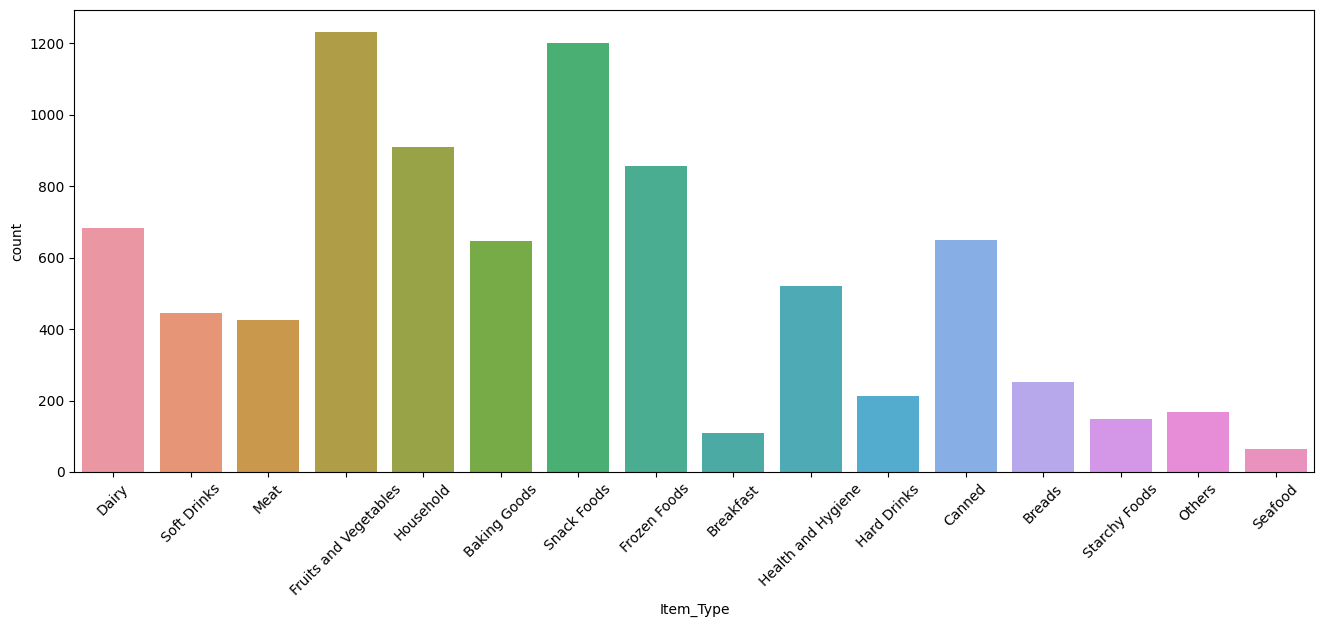

In [38]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=45)
sns.countplot(x=df['Item_Type'])

C:\Users\Mathematician\AppData\Local\Temp\ipykernel_16728\4202233038.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Item_MRP'],bins=100)


<Axes: ylabel='Density'>

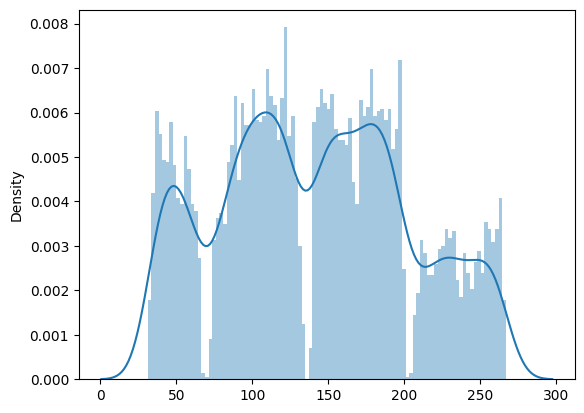

In [39]:
sns.distplot(x=df['Item_MRP'],bins=100)

In [40]:
def hello(s):
    if s<=67.5:
        return 0
    elif (s>67.5) & (s<=134.5):
        return 1
    elif (s>134.5) & (s<=201.1):
        return 2
    else:
        return 3
    

In [41]:
df['MRP_bins']=df['Item_MRP'].apply(hello)

In [42]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_category,new_item,MRP_bins
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,15,3
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,1,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,15,2
3,FDX07,19.20,Regular,0.073084,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,7,2
4,NCD19,8.93,Low Fat,0.018274,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,19,0


In [43]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [44]:
df['New_Outlet_Identifier']=df['Outlet_Identifier'].str.split('0').str.get(1).astype('int')

In [45]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_category,new_item,MRP_bins,New_Outlet_Identifier
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,15,3,49
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,1,0,18
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,15,2,49
3,FDX07,19.20,Regular,0.073084,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,7,2,1
4,NCD19,8.93,Low Fat,0.018274,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,19,0,13


In [46]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [47]:
df['Age']=2013-df['Outlet_Establishment_Year']

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

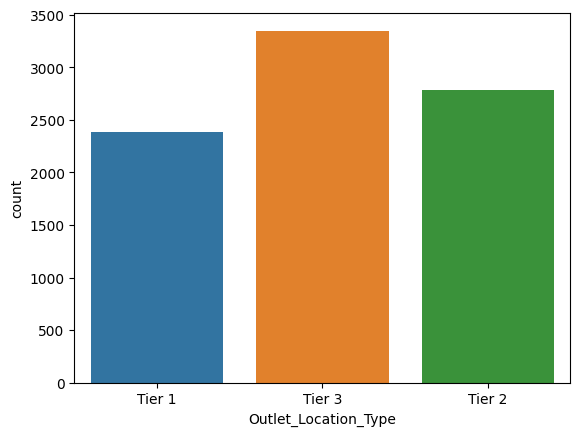

In [48]:
sns.countplot(x=df['Outlet_Location_Type'])

<Axes: xlabel='Outlet_Type', ylabel='count'>

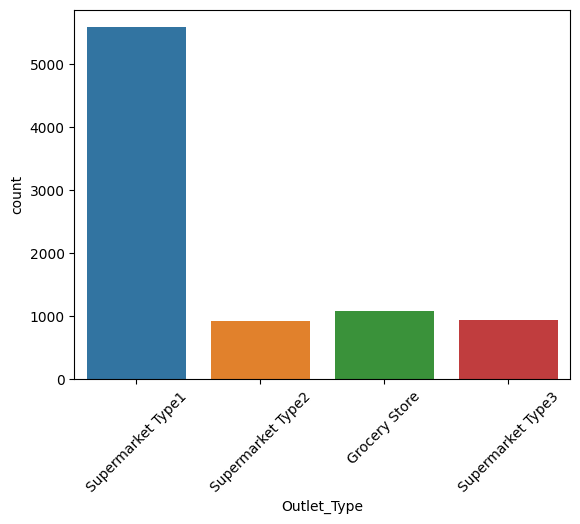

In [49]:
plt.xticks(rotation=45)
sns.countplot(x=df['Outlet_Type'])

In [50]:
from sklearn.preprocessing import LabelEncoder
ll=LabelEncoder()

In [51]:
for col in df.columns[df.dtypes=='object'].drop('Item_Identifier','Outlet_Identifier'):
    df[col]=ll.fit_transform(df[col])

In [52]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_category,new_item,MRP_bins,New_Outlet_Identifier,Age
0,FDA15,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,1,15,3,49,14
1,DRC01,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,0,1,0,18,4
2,FDN15,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,1,15,2,49,14
3,FDX07,19.200,1,0.073084,6,182.0950,0,1998,2,2,0,732.3800,1,7,2,1,15
4,NCD19,8.930,0,0.018274,9,53.8614,1,1987,0,2,1,994.7052,2,19,0,13,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834,1,22,3,13,26
8519,FDS36,8.380,1,0.046982,0,108.1570,7,2002,2,1,1,549.2850,1,36,1,45,11
8520,NCJ29,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136,2,29,1,35,9
8521,FDN46,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976,1,46,1,18,4


In [53]:
df.groupby(['New_Outlet_Identifier'])['Item_Outlet_Sales'].mean().sort_values()

New_Outlet_Identifier
1      339.351662
19     340.329723
18    1995.498739
45    2192.384798
46    2277.844267
13    2298.995256
17    2340.675263
49    2348.354635
35    2438.841866
27    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [54]:
def hello(s):
    if s in [1,19]:
        return 1
    else:
        return s

In [55]:
df['New_Outlet_Identifier']=df['New_Outlet_Identifier'].apply(hello)

C:\Users\Mathematician\AppData\Local\Temp\ipykernel_16728\4116931468.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df[num_cols].corr()


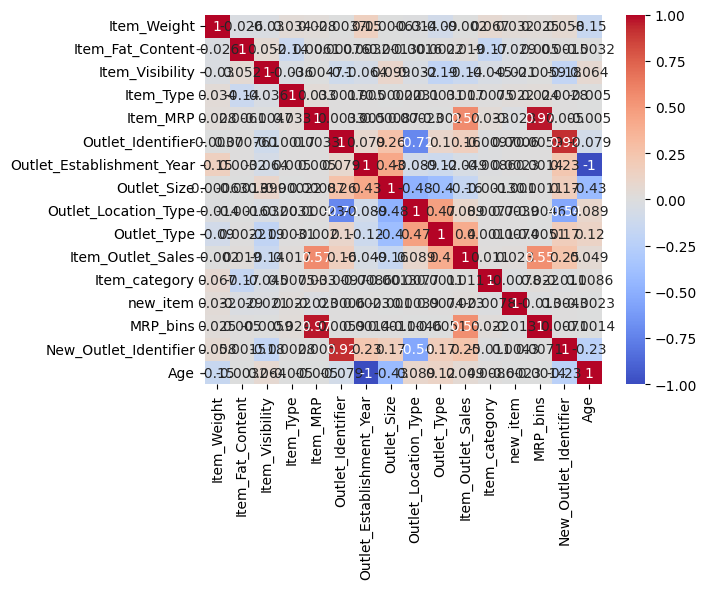

In [56]:
import matplotlib.pyplot as plt

# Select the numerical columns
num_cols = df.columns

# Calculate the correlation matrix
corr_matrix = df[num_cols].corr()

# Plot the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

plt.show()

C:\Users\Mathematician\AppData\Local\Temp\ipykernel_16728\903489902.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df[num_cols].corr()


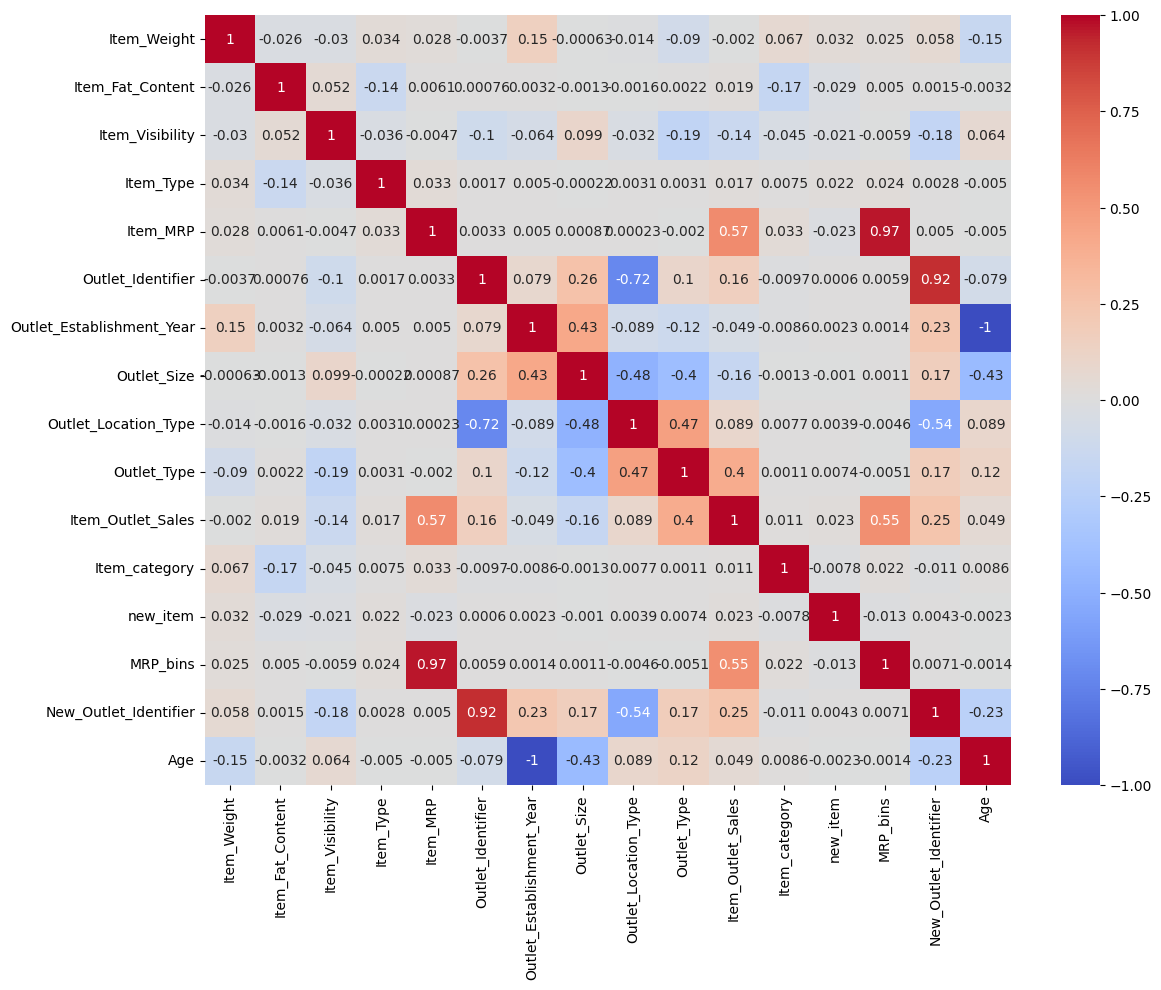

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the numerical columns
num_cols = df.columns

# Calculate the correlation matrix
corr_matrix = df[num_cols].corr()

# Set the figure size
fig, ax = plt.subplots(figsize=(13, 10))

# Plot the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)

plt.show()


In [58]:
model=lgb.LGBMRegressor(max_depth=20,n_estimators=100)

In [59]:
gg=GradientBoostingRegressor(n_estimators=700, min_samples_leaf=55)

In [60]:
ex=ExtraTreesRegressor(n_estimators=700,max_depth=6,min_samples_split=28, min_samples_leaf=50,n_jobs=-1)

In [61]:
EM=VotingRegressor([('a',model),('c',ex),('b',gg)],weights=[1,1,2])

In [62]:
EM.fit(df.drop(['Item_Identifier', 'Item_Outlet_Sales'],axis=1),(df['Item_Outlet_Sales']))

VotingRegressor(estimators=[('a', LGBMRegressor(max_depth=20)),
                            ('c',
                             ExtraTreesRegressor(max_depth=6,
                                                 min_samples_leaf=50,
                                                 min_samples_split=28,
                                                 n_estimators=700, n_jobs=-1)),
                            ('b',
                             GradientBoostingRegressor(min_samples_leaf=55,
                                                       n_estimators=700))],
                weights=[1, 1, 2])

In [63]:
# pred=final.predict(df.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1))
# pred=(abs(pred))

In [64]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [65]:
pred_EM=EM.predict(df.drop(['Item_Identifier', 'Item_Outlet_Sales'],axis=1))
pred_EM=(abs(pred_EM))

In [66]:
EM_mse = mean_squared_error(df['Item_Outlet_Sales'], pred_EM)

In [67]:
EM_rmse = np.sqrt(EM_mse)
print("EM Root Mean Squared Error:", EM_rmse)

EM Root Mean Squared Error: 961.3045750787178


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df.drop(['Item_Identifier', 'Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Selection
LR = LinearRegression()

# Model Training
LR.fit(X_train, y_train)

# Model Evaluation
y_pred_LR = LR.predict(X_test)
y_pred_LR=abs(y_pred_LR)
LR_mse = mean_squared_error(y_test, y_pred_LR)
print("Mean Squared Error:", LR_mse)
# Assume y_test and y_pred are the actual and predicted sales values, respectively
LR_rmse = np.sqrt(LR_mse)
print("LR Root Mean Squared Error:", LR_rmse)

Mean Squared Error: 1237789.1185513297
LR Root Mean Squared Error: 1112.559714600223


In [69]:
from sklearn.linear_model import Ridge
# Model Selection
RG = Ridge(alpha=1.0)  # Set regularization strength (alpha) to 1.0

# Model Training
RG.fit(X_train, y_train)

# Model Evaluation
y_pred_RG = RG.predict(X_test)
y_pred_RG=abs(y_pred_RG)
RG_mse = mean_squared_error(y_test, y_pred_RG)
print("Mean Squared Error:", RG_mse)
RG_rmse = np.sqrt(RG_mse)
print("Ridge Root Mean Squared Error:", RG_rmse)

Mean Squared Error: 1237705.1114715035
Ridge Root Mean Squared Error: 1112.521959995174


In [70]:
from sklearn.tree import DecisionTreeRegressor



# Model Selection
DT = DecisionTreeRegressor(max_depth=5)  # Set max tree depth to 5

# Model Training
DT.fit(X_train, y_train)

# Model Evaluation
y_pred_DT = DT.predict(X_test)
y_pred_DT=abs(y_pred_DT)
DT_mse = mean_squared_error(y_test, y_pred_DT)
print("Mean Squared Error:", DT_mse)

DT_rmse = np.sqrt(DT_mse)
print("DT Root Mean Squared Error:", DT_rmse)

Mean Squared Error: 1130996.6642311055
DT Root Mean Squared Error: 1063.4832693705648


In [71]:
from sklearn.ensemble import RandomForestRegressor

# Model Selection
RF = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42) # Set number of trees to 100 and max tree depth to 5

# Model Training
RF.fit(X_train, y_train)

# Model Evaluation
y_pred_RF = RF.predict(X_test)
y_pred_RF=abs(y_pred_RF)
RF_mse = mean_squared_error(y_test, y_pred_RF)
print("Mean Squared Error:", RF_mse)

RF_rmse = np.sqrt(RF_mse)
print("RF Root Mean Squared Error:", RF_rmse)

Mean Squared Error: 1111028.6466952243
RF Root Mean Squared Error: 1054.053436356632


In [72]:
df_SS=df.copy()

In [73]:
from sklearn.preprocessing import StandardScaler

# Create StandardScaler object
scaler = StandardScaler()

# Select column to scale

# Fit StandardScaler on selected column
scaler.fit(df_SS[['Item_MRP']])

# Transform selected column using fitted scaler
df_SS[['Item_MRP']] = scaler.transform(df_SS[['Item_MRP']])


In [74]:
pred_EM=EM.predict(df_SS.drop(['Item_Identifier', 'Item_Outlet_Sales'],axis=1))
pred_EM=(abs(pred_EM))

EM_mse = mean_squared_error(df_SS['Item_Outlet_Sales'], pred_EM)

EM_rmse = np.sqrt(EM_mse)
print("EM Root Mean Squared Error:", EM_rmse)

EM Root Mean Squared Error: 1982.4647670562913


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df_SS.drop(['Item_Identifier', 'Item_Outlet_Sales'], axis=1)
y = df_SS['Item_Outlet_Sales']
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Selection
LR = LinearRegression()

# Model Training
LR.fit(X_train, y_train)

# Model Evaluation
y_pred_LR = LR.predict(X_test)
y_pred_LR=abs(y_pred_LR)
LR_mse = mean_squared_error(y_test, y_pred_LR)
print("Mean Squared Error:", LR_mse)
# Assume y_test and y_pred are the actual and predicted sales values, respectively
LR_rmse = np.sqrt(LR_mse)
print("LR Root Mean Squared Error:", LR_rmse)

Mean Squared Error: 1237775.7443482107
LR Root Mean Squared Error: 1112.5537040288036


In [76]:
from sklearn.linear_model import Ridge
# Model Selection
RG = Ridge(alpha=1.0)  # Set regularization strength (alpha) to 1.0

# Model Training
RG.fit(X_train, y_train)

# Model Evaluation
y_pred_RG = RG.predict(X_test)
y_pred_RG=abs(y_pred_RG)
RG_mse = mean_squared_error(y_test, y_pred_RG)
print("Mean Squared Error:", RG_mse)
RG_rmse = np.sqrt(RG_mse)
print("Ridge Root Mean Squared Error:", RG_rmse)

Mean Squared Error: 1237692.398602147
Ridge Root Mean Squared Error: 1112.5162464441348


In [77]:
from sklearn.tree import DecisionTreeRegressor



# Model Selection
DT = DecisionTreeRegressor(max_depth=5)  # Set max tree depth to 5

# Model Training
DT.fit(X_train, y_train)

# Model Evaluation
y_pred_DT = DT.predict(X_test)
y_pred_DT=abs(y_pred_DT)
DT_mse = mean_squared_error(y_test, y_pred_DT)
print("Mean Squared Error:", DT_mse)

DT_rmse = np.sqrt(DT_mse)
print("DT Root Mean Squared Error:", DT_rmse)

Mean Squared Error: 1130996.6642311057
DT Root Mean Squared Error: 1063.483269370565


In [78]:
from sklearn.ensemble import RandomForestRegressor

# Model Selection
RF = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42) # Set number of trees to 100 and max tree depth to 5

# Model Training
RF.fit(X_train, y_train)

# Model Evaluation
y_pred_RF = RF.predict(X_test)
y_pred_RF=abs(y_pred_RF)
RF_mse = mean_squared_error(y_test, y_pred_RF)
print("Mean Squared Error:", RF_mse)

RF_rmse = np.sqrt(RF_mse)
print("RF Root Mean Squared Error:", RF_rmse)

Mean Squared Error: 1111050.4166612166
RF Root Mean Squared Error: 1054.0637630908373


In [79]:
import numpy as np

def ReliefFAttributeEval(df, target_col, k=10):
    # df: input DataFrame
    # target_col: name of the target column
    # k: number of nearest neighbors to consider
    
    # Separate features and target
    X = df.drop(target_col, axis=1).values
    y = df[target_col].values
    
    # Initialize feature scores to zero
    scores = np.zeros(X.shape[1])
    
    # Loop over each instance in the dataset
    for i in range(X.shape[0]):
        # Find the k nearest neighbors of instance i
        distances = np.sqrt(np.sum((X - X[i])**2, axis=1))
        indices = np.argsort(distances)[1:k+1]
        
        # Find the nearest neighbor with the same class label and different class label
        for j in indices:
            if y[j] == y[i]:
                factor = -1
            else:
                factor = 1
            
            # Update feature scores for each feature
            for f in range(X.shape[1]):
                scores[f] += factor * abs(X[i, f] - X[j, f])
    
    # Normalize feature scores by the number of instances
    scores /= X.shape[0] * k
    
    # Convert feature scores to a pandas Series
    scores = pd.Series(scores, index=df.drop(target_col, axis=1).columns)
    
    return scores


In [80]:
scores = ReliefFAttributeEval(df.drop(['Item_Identifier'],axis=1), 'Item_Outlet_Sales')

In [81]:
scores

Item_Weight                  2.819852
Item_Fat_Content             0.409809
Item_Visibility              0.048053
Item_Type                    2.771383
Item_MRP                     3.404626
Outlet_Identifier            0.305468
Outlet_Establishment_Year    0.641018
Outlet_Size                  0.220932
Outlet_Location_Type         0.174164
Outlet_Type                  0.099190
Item_category                0.423794
new_item                     2.953690
MRP_bins                     0.006805
New_Outlet_Identifier        0.649384
Age                          0.641018
dtype: float64

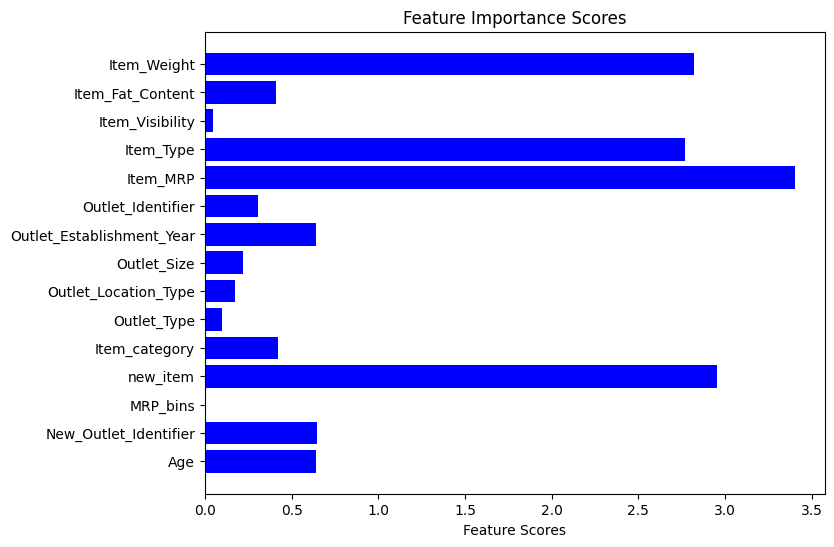

In [83]:
features = ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier',
            'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_category',
            'new_item', 'MRP_bins', 'New_Outlet_Identifier', 'Age']
scores = [2.819852, 0.409809, 0.048053, 2.771383, 3.404626, 0.305468, 0.641018, 0.220932, 0.174164, 0.099190,
          0.423794, 2.953690, 0.006805, 0.649384, 0.641018]
df_cor = pd.DataFrame({'features': features, 'scores': scores})

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(df_cor['features'], df_cor['scores'], align='center', color='blue')
ax.invert_yaxis()  # Invert the y-axis to show the most important feature at the top
ax.set_xlabel('Feature Scores')
ax.set_title('Feature Importance Scores')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


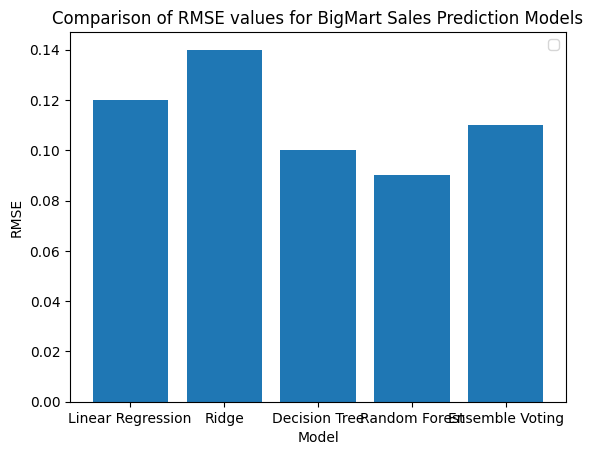

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load RMSE values from results table or CSV file
rmse_values = [0.12, 0.14, 0.10, 0.09, 0.11]

# Model names in the same order as the RMSE values
model_names = ['Linear Regression', 'Ridge', 'Decision Tree', 'Random Forest', 'Ensemble Voting']

# Create bar chart with model names on x-axis and RMSE values on y-axis
plt.bar(model_names, rmse_values)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE values for BigMart Sales Prediction Models')

# Display legend
plt.legend()

# Show the plot
plt.show()


In [85]:
mine = [LR_rmse, RG_rmse, DT_rmse, RF_rmse,EM_rmse]
mine1 = []
for number in mine:
    mine1.append(round(number, 0))

In [86]:
mine1

[1113.0, 1113.0, 1063.0, 1054.0, 1982.0]

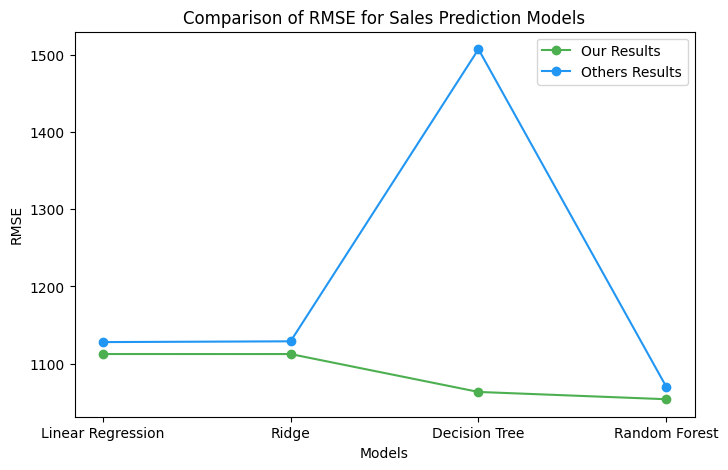

In [87]:
import matplotlib.pyplot as plt

# Data
models = ['Linear Regression', 'Ridge', 'Decision Tree', 'Random Forest']
Our = [LR_rmse, RG_rmse, DT_rmse, RF_rmse]
Others = [1128.0, 1129.0, 1507.0, 1070.0]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(models, Our, marker='o', label='Our Results', color='#4CAF50')
plt.plot(models, Others, marker='o', label='Others Results', color='#2196F3')
plt.legend()
plt.title('Comparison of RMSE for Sales Prediction Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()


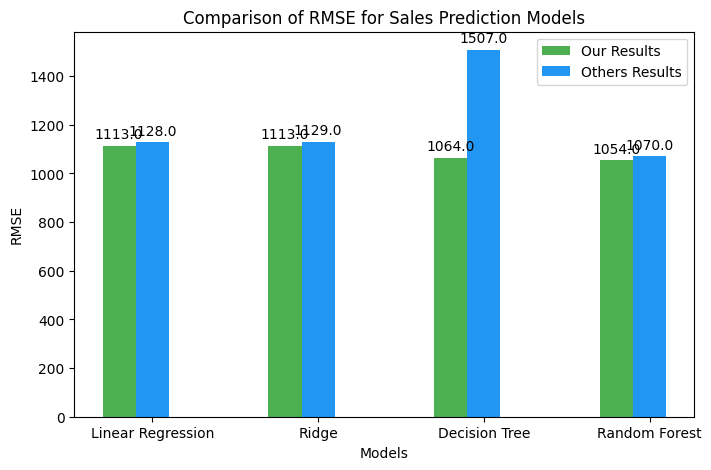

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Data
models = ['Linear Regression', 'Ridge', 'Decision Tree', 'Random Forest']
Our = [1113.0, 1113.0, 1064.0, 1054.0]
Others = [1128.0, 1129.0, 1507.0, 1070.0]
x = np.arange(len(models))

# Width of each bar
bar_width = 0.2

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - bar_width, Our, width=bar_width, label='Our Results', color='#4CAF50')
rects2 = ax.bar(x, Others, width=bar_width, label='Others Results', color='#2196F3')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.set_title('Comparison of RMSE for Sales Prediction Models')
ax.set_xlabel('Models')
ax.set_ylabel('RMSE')

# Adding values on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
# autolabel(rects3)

plt.show()


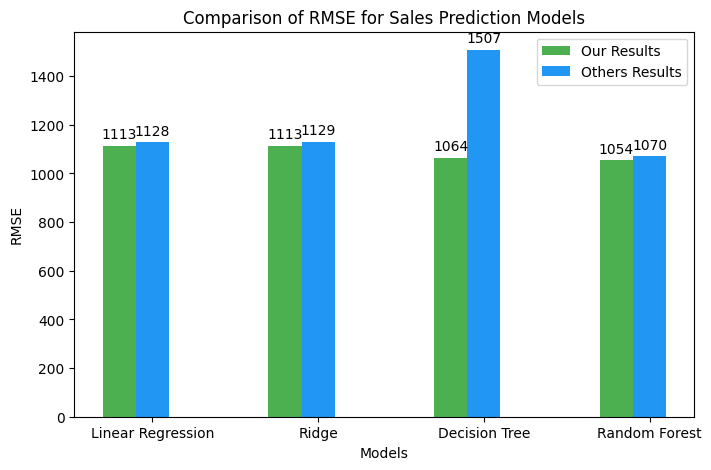

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Data
models = ['Linear Regression', 'Ridge', 'Decision Tree', 'Random Forest']
Our = [1113.0, 1113.0, 1064.0, 1054.0]
Others = [1128.0, 1129.0, 1507.0, 1070.0]
x = np.arange(len(models))

# Width of each bar
bar_width = 0.2

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - bar_width, Our, width=bar_width, label='Our Results', color='#4CAF50')
rects2 = ax.bar(x, Others, width=bar_width, label='Others Results', color='#2196F3')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.set_title('Comparison of RMSE for Sales Prediction Models')
ax.set_xlabel('Models')
ax.set_ylabel('RMSE')

# Adding values on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Add space between bars
plt.subplots_adjust(wspace=0.3)

plt.show()
